# (review) Graph Neural Network-Based Anomaly Detection in Multivariate Time Series
> 논문

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [GNN]

github: https://github.com/d-ailin/GDN

https://arxiv.org/pdf/2106.06947.pdf

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

### 3.1 Problem Statement

- $N$ 개 sensors
- $T_{min}$ 개 time stick
- $S_{train} = [ s^{(1)}_{train} \dots s^{(T_{min}}_{train} ]$

In [52]:
Strain = pd.concat([pd.DataFrame([f"서울{idx}" for idx in range(1,366)]).T,
           pd.DataFrame([f"경기{idx}" for idx in range(1,366)]).T,
          pd.DataFrame([f"부산{idx}" for idx in range(1,366)]).T],axis=0)
Strain

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,서울1,서울2,서울3,서울4,서울5,서울6,서울7,서울8,서울9,서울10,...,서울356,서울357,서울358,서울359,서울360,서울361,서울362,서울363,서울364,서울365
0,경기1,경기2,경기3,경기4,경기5,경기6,경기7,경기8,경기9,경기10,...,경기356,경기357,경기358,경기359,경기360,경기361,경기362,경기363,경기364,경기365
0,부산1,부산2,부산3,부산4,부산5,부산6,부산7,부산8,부산9,부산10,...,부산356,부산357,부산358,부산359,부산360,부산361,부산362,부산363,부산364,부산365


In [55]:
Strain_1 = Strain.iloc[:,0]
Strain_1

0    서울1
0    경기1
0    부산1
Name: 0, dtype: object

In [56]:
Strain_365 = Strain.iloc[:,364]
Strain_365

0    서울365
0    경기365
0    부산365
Name: 364, dtype: object

$S_{train}^{(t)} \in \mathbb{R}^{N}$

In [58]:
Stest = pd.concat([pd.DataFrame([f"서울{idx}" for idx in range(366,731)]).T,
           pd.DataFrame([f"경기{idx}" for idx in range(366,731)]).T,
          pd.DataFrame([f"부산{idx}" for idx in range(366,731)]).T],axis=0)
Stest

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,서울366,서울367,서울368,서울369,서울370,서울371,서울372,서울373,서울374,서울375,...,서울721,서울722,서울723,서울724,서울725,서울726,서울727,서울728,서울729,서울730
0,경기366,경기367,경기368,경기369,경기370,경기371,경기372,경기373,경기374,경기375,...,경기721,경기722,경기723,경기724,경기725,경기726,경기727,경기728,경기729,경기730
0,부산366,부산367,부산368,부산369,부산370,부산371,부산372,부산373,부산374,부산375,...,부산721,부산722,부산723,부산724,부산725,부산726,부산727,부산728,부산729,부산730


In [59]:
Steat_1 = Stest.iloc[:,0]
Steat_1

0    서울366
0    경기366
0    부산366
Name: 0, dtype: object

In [62]:
Stest_365 = Stest.iloc[:,364]
Stest_365

0    서울730
0    경기730
0    부산730
Name: 364, dtype: object

$a(t) \in \{ 0,1 \}$

$a(t) = 1$  indicates that time t is anomalous.

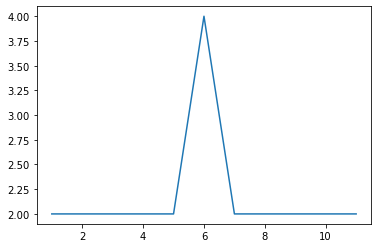

In [68]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11],[2,2,2,2,2,4,2,2,2,2,2])

여기서 $a(6) = 1$, 나머지는 0

### 3.3 Sensor Embedding

we do this by introducing an embedding vector for each sensor, representing its characteristics:

$v_i \in \mathbb{R}^{d} , \text{for  } i \in \{ 1,2, \dots , N \}$

In [77]:
['V_서울','V_부산', 'V_경기']

['V_서울', 'V_부산', 'V_경기']

In [80]:
v_서울 = pd.DataFrame([f"서울{idx}" for idx in range(1,10)]).T
v_서울

,0,1,2,3,4,5,6,7,8
0,서울1,서울2,서울3,서울4,서울5,서울6,서울7,서울8,서울9


$v_i$의 $d$ 는 임의로 정하는 것이며, 이는 $S_{traIn}$의 행을 의미한다.
- v_서울은 1행에서 10개를 뽑은 것

### 3.4 Graph Structure Learning

This prior information can be flexibly represented as a set of candidate relations $\mathcal{C}_i$ for each sensor $i$, i.e. the sensors it could be dependent on:

$\mathcal{C}_i \subseteq \{ 1,2, \dots , N \} \ \{ i \}$

In [81]:
C_서울 = ['경기','인천']
C_서울

['경기', '인천']

위와 같이 인접 구역을 의미하며, 인접 거리에 대한 정의는 임의로

$e_{ji} = \cfrac{v_i^{\top} v_j}{||v_i||\cdot||v_j||} \text{for  } j \in \mathcal{C}_i$

위는 distance 개념

$A_{ji} = \mathbb{1} \{ j \in \text{TopK } (\{e_{ki} : k \in \mathcal(C)_i \} ) \}$

연결 되면 1이 되고, 연결되어 있지 않으면 0이 된다.

$e_{ji}$와 $A_{ji}$는 모두 $\mathcal{C}_i$의 연장선이다.

$\mathcal{C}_i$에서 아무리 길게 정해도 $A_{ji}$에서 정한 top을 넘으면 잘림!

TopK denotes the indices of top-k values among its input (i.e. the normalized dot products).

###  3.5 Graph Attention-Based Forecasting

$x^{(t)} \in \mathbb{R}^{N \times w}$

$x^{(t)} := [s^{(t-w)},s^{(t-w+1)},\dots, s^{(t-1)}]$

In [92]:
x_t = pd.DataFrame([['서울1','서울2','서울t-w','서울t-2','서울t-1'],['경기1','경기2','경기t-w','경기t-2','경기t-1'],['인천1','인천2','인천t-w','인천t-2','인천t-1']])
x_t

,0,1,2,3,4
0,서울1,서울2,서울t-w,서울t-2,서울t-1
1,경기1,경기2,경기t-w,경기t-2,경기t-1
2,인천1,인천2,인천t-w,인천t-2,인천t-1


이 $x_t$는 $S_{train}$에서 추출된 w 열 만큼의 데이터이다.

In [99]:
s_t_1 = x_t.iloc[:,4] # S(t-1)
s_t_1

0    서울t-1
1    경기t-1
2    인천t-1
Name: 4, dtype: object

In [100]:
s_t_w = x_t.iloc[:,2] # S(t-w)
s_t_w

0    서울t-w
1    경기t-w
2    인천t-w
Name: 2, dtype: object

$z_i^{(t)} = \text{ReLU} \big( \alpha_{i,i} W x_{i}^{(t)} + \sum_{j \in \mathbb{N}(i)} \alpha_{i,j} W x_{j}^{(t)} \big)$

여기서 $z_{i}^{(t)}$는 $d \times 1$ 행렬

$x_{i}^{(t)} \in \mathbb{R}^{w}$

$\mathcal{N}(i) = \{ j | A_{ji} > 0 \}$

$W \in \mathbb{R}^{d \times w}$